This notebook is for the Journal of Climate paper 'Robust polar amplification in ice-free climates relies on ocean heat transport and cloud radiative effects', by Mark England and Nicole Feldl (2024), doi: 10.1175/JCLI-D-23-0151.1

Abstract: A fundamental divide exists between previous studies which conclude that polar amplification does not occur without sea ice and studies which find that polar amplification is an inherent feature of the atmosphere independent of sea ice. We hypothesise that a representation of climatological ocean heat transport is key for simulating polar amplification in ice-free climates. To investigate this we run a suite of targeted experiments in the slab ocean aquaplanet configuration of CESM2-CAM6 with different profiles of prescribed ocean heat transport, which are invariant under CO2 quadrupling. In simulations without climatological ocean heat transport, polar amplification does not occur. In contrast, in simulations with climatological ocean heat transport, robust polar amplification occurs in all seasons. What is causing this dependence of polar amplification on ocean heat transport? Energy-balance model theory is incapable of explaining our results and in fact would predict that introducing ocean heat transport leads to less polar amplification. We instead demonstrate that shortwave cloud radiative feedbacks can explain the divergent polar climate responses simulated by CESM2-CAM6. Targeted cloud locking experiments in the zero ocean heat transport simulations are able to reproduce the polar amplification of the climatological ocean heat transport simulations, solely by prescribing high latitude cloud radiative feedbacks. We conclude that polar amplification in ice-free climates is underpinned by ocean-atmosphere coupling, through a less negative high latitude shortwave cloud radiative feedback that facilitates enhanced polar warming. In addition to reconciling previous disparities, these results have important implications for interpreting past equable climates and climate projections under high emissions scenarios.

In [1]:
# Import packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cftime
from scipy.misc import derivative
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

/Users/markengland/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
# Path and file names for CESM2 simulations
path='../Data/'
fnames='CAM6AquaSOM_noice_*xCO2_*.lon.cam.h0.0020-*.nc'

# Process the data
ds = xr.open_mfdataset(path+fnames,decode_times=True,concat_dim='ensemble',combine='nested')
ds = ds.drop('lon') # drop longitude dimension because zonal average already
ds_am = ds.mean('time') # take annual mean
weights = np.cos(np.deg2rad(ds.lat))
ds_am_gm = ds_am.weighted(weights).mean('lat') # take global mean

# This set of data will be used for aligning polar seasonal cylce of NH and SH
ds2 = xr.open_mfdataset(path+fnames,decode_times=True,concat_dim='ensemble',combine='nested')
ds2 = ds2.drop('lon') # take annual mean
ds2_am = ds2.mean('time')
ds2_am_gm = ds2_am.weighted(weights).mean('lat') # take global mean

# Figure 1

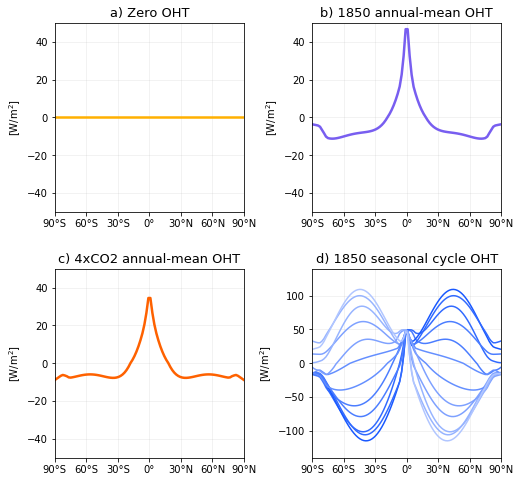

In [5]:
path='../Data/'
fnames='som*.nc'
# Open the q-flux data
ds_som = xr.open_mfdataset(path+fnames,decode_times=True,concat_dim='ensemble',combine='nested')
field = ds_som.qdp

fig, axs = plt.subplots(2,2)

axs[0,0].plot(ds_som["lat"],field[0,0,:,0].transpose(),color="#FFB000",linewidth=2.5)
axs[0,0].set(xlim=(-90,90))
axs[0,0].set(ylim=[-50,50])
axs[0,0].title.set_text('a) Zero OHT')
axs[0,0].set(ylabel="[W/m$^2$]")
axs[0,0].title.set_size(13)
axs[0,0].set_xticks([-90,-60,-30,0,30,60,90])
lat_formatter = LatitudeFormatter()
axs[0,0].xaxis.set_major_formatter(lat_formatter)
axs[0,0].grid(alpha=0.2)

axs[0,1].plot(ds_som["lat"],field[2,0,:,0].transpose(),color="#785EF0",linewidth=2.5)
axs[0,1].set(xlim=(-90,90))
axs[0,1].set(ylim=[-50,50])
axs[0,1].title.set_text('b) 1850 annual-mean OHT')
axs[0,1].set(ylabel="[W/m$^2$]")
axs[0,1].title.set_size(13)
axs[0,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[0,1].xaxis.set_major_formatter(lat_formatter)
axs[0,1].grid(alpha=0.2)

axs[1,0].plot(ds_som["lat"],field[1,0,:,0].transpose(),color="#FE6100",linewidth=2.5)
axs[1,0].set(xlim=(-90,90))
axs[1,0].set(ylim=[-50,50])
axs[1,0].title.set_text('c) 4xCO2 annual-mean OHT')
axs[1,0].set(ylabel="[W/m$^2$]")
axs[1,0].title.set_size(13)
axs[1,0].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,0].xaxis.set_major_formatter(lat_formatter)
axs[1,0].grid(alpha=0.2)

axs[1,1].title.set_size(13)
axs[1,1].plot(ds_som["lat"],field[3,0,:,0].transpose(),color="#97b4ff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,1,:,0].transpose(),color="#7ea1ff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,2,:,0].transpose(),color="#648fff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,3,:,0].transpose(),color="#4b7dff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,4,:,0].transpose(),color="#316aff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,5,:,0].transpose(),color="#1858ff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,6,:,0].transpose(),color="#316aff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,7,:,0].transpose(),color="#4b7dff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,8,:,0].transpose(),color="#648fff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,9,:,0].transpose(),color="#7ea1ff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,10,:,0].transpose(),color="#97b4ff",linewidth=1.5)
axs[1,1].plot(ds_som["lat"],field[3,11,:,0].transpose(),color="#b1c6ff",linewidth=1.5)
axs[1,1].set(xlim=(-90,90))
axs[1,1].set(ylim=[-140,140])
axs[1,1].title.set_text('d) 1850 seasonal cycle OHT')
axs[1,1].set(ylabel="[W/m$^2$]")
axs[1,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,1].xaxis.set_major_formatter(lat_formatter)
axs[1,1].grid(alpha=0.2)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.36, hspace=0.3)
fig.set_figheight(8)
fig.set_figwidth(8)

# plt.savefig('Fig1.pdf', bbox_inches='tight')

In [17]:
# Create a new time variable for aligning NH and SH polar seasonal cycle

time = ds.time
time4 = np.array([cftime.DatetimeNoLeap(20, 8, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 9, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 10, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 11, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 12, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(21, 1, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 4, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 5, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 6, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(20, 7, 1, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
ds2_am=ds2_am.assign_coords(time=time4)
ds2 = ds2.assign_coords(time=time4)

# Figure 2

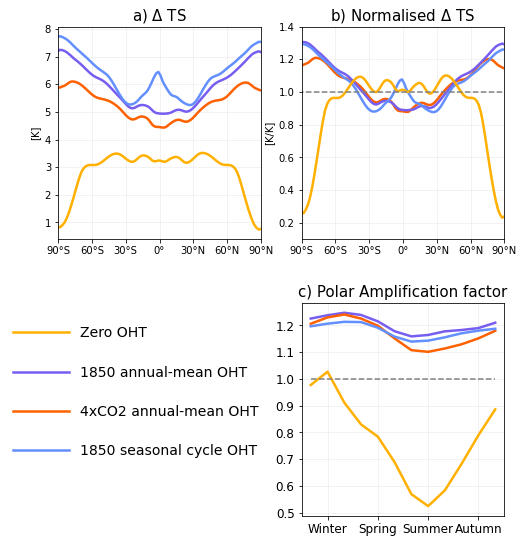

In [22]:
field = ds_am["TS"]
field_gm = ds_am_gm["TS"]

y1 = [0,8]

fig, axs = plt.subplots(2,2) 

plt.tick_params(axis='both', which='major', labelsize=12)

axs[0,0].plot(ds_am["lat"],field[5]-field[0],color="#FE6100",linewidth=2.5) # 4xCO2 OHT
axs[0,0].plot(ds_am["lat"],field[6]-field[1],color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[0,0].plot(ds_am["lat"],field[7]-field[2],color="#648FFF",linewidth=2.5) # 1850 SC OHT
axs[0,0].plot(ds_am["lat"],field[8]-field[3],color="#FFB000",linewidth=2.5) # Zero OHT

axs[0,0].set(xlim=(-90,90))
# axs[0,0].set(ylim=[0,12])
axs[0,0].title.set_text('a) $\Delta$ TS')
axs[0,0].set(ylabel="[K]")

axs[0,0].title.set_size(15)
axs[0,0].set_xticks([-90,-60,-30,0,30,60,90])
lat_formatter = LatitudeFormatter()
axs[0,0].xaxis.set_major_formatter(lat_formatter)
axs[0,0].grid(alpha=0.2)

axs[0,1].plot(ds_am["lat"],(field[5]-field[0])/(field_gm[5]-field_gm[0]),color="#FE6100",linewidth=2.5) # 4xCO2 OHT
axs[0,1].plot(ds_am["lat"],(field[6]-field[1])/(field_gm[6]-field_gm[1]),color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[0,1].plot(ds_am["lat"],(field[7]-field[2])/(field_gm[7]-field_gm[2]),color="#648FFF",linewidth=2.5) # 1850 SC OHT
axs[0,1].plot(ds_am["lat"],(field[8]-field[3])/(field_gm[8]-field_gm[3]),color="#FFB000",linewidth=2.5) # Zero OHT
axs[0,1].set(xlim=(-90,90))
axs[0,1].set(ylim=[0.1,1.4])
axs[0,1].title.set_text('b) Normalised $\Delta$ TS')
axs[0,1].set(ylabel="[K/K]")
axs[0,1].hlines(y=1.0,xmin=-100,xmax=100,color="grey",linestyle="dashed")
axs[0,1].title.set_size(15)
axs[0,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[0,1].xaxis.set_major_formatter(lat_formatter)
axs[0,1].grid(alpha=0.2)


field1=ds["TS"][:,:,80:96].weighted(weights).mean('lat')
field2=ds2["TS"][:,:,0:16].weighted(weights).mean('lat')
field3 = field1[:,0:6]+field2[:,6:12]
field4 = field1[:,6:12]+field2[:,0:6]
field=field1
field[:,0:6] = field3/2.0
field[:,6:12] = field4/2.0

axs[1,0].axis('off')

axs[1,1].plot(np.arange(1,13,1),(field[8]-field[3])/(field_gm[8]-field_gm[3]),color="#FFB000",linewidth=2.5) # Zero OHT
axs[1,1].plot(np.arange(1,13,1),(field[6]-field[1])/(field_gm[6]-field_gm[1]),color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[1,1].plot(np.arange(1,13,1),(field[5]-field[0])/(field_gm[5]-field_gm[0]),color="#FE6100",linewidth=2.5) # 4xCO2 OHT
axs[1,1].plot(np.arange(1,13,1),(field[7]-field[2])/(field_gm[7]-field_gm[2]),color="#648FFF",linewidth=2.5) # 1850 SC OHT

axs[1,1].title.set_text('c) Polar Amplification factor')
axs[1,1].title.set_size(15)
axs[1,1].legend(["Zero OHT ","1850 annual-mean OHT","4xCO2 annual-mean OHT","1850 seasonal cycle OHT",],bbox_to_anchor=(-0.15, 0.95),\
                frameon=False,fontsize=14,labelspacing=1.8,handlelength=4)
axs[1,1].set(xticks=[2,5,8,11],xticklabels=["Winter","Spring","Summer","Autumn"])
axs[1,1].hlines(y=1.0,xmin=1,xmax=12,color="grey",linestyle="dashed")
axs[1,1].grid(alpha=0.2)


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
fig.set_figheight(9)
fig.set_figwidth(8)

# plt.savefig('Fig2.pdf', bbox_inches='tight')

Note that Figure 3 is at the bottom because it involves running an energy balance model

# Figure 4

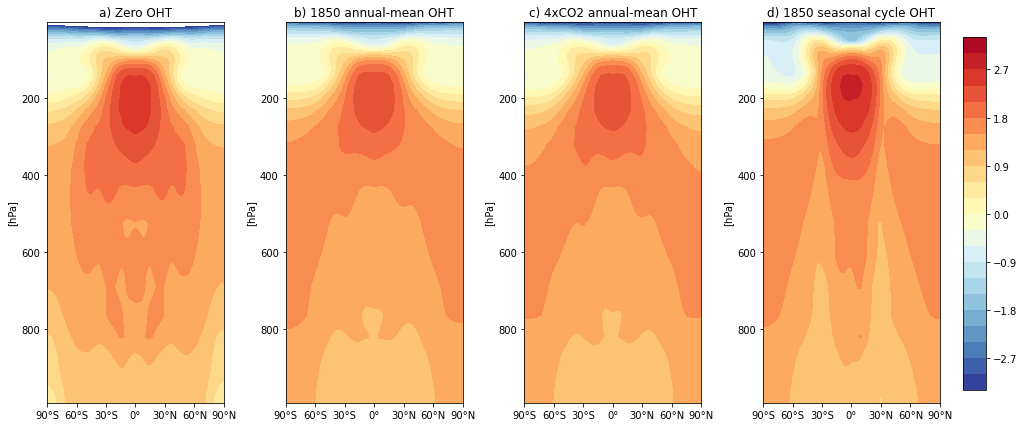

In [24]:
fig, axs = plt.subplots(1,4)

field = ds_am["T"]
field_gm = ds_am_gm["TS"]
# Scale by global mean surface temperature response

# Zero OHT
cx1=axs[0].contourf(ds_am["lat"], ds_am["lev"], (field[8]-field[3])/(field_gm[8]-field_gm[3]),cmap=plt.cm.RdYlBu_r\
                      ,levels=np.arange(-1.1,1.2,0.1)*3)
axs[0].invert_yaxis()
axs[0].title.set_text('a) Zero OHT')
axs[0].set(ylabel="[hPa]")
axs[0].set_xticks([-90,-60,-30,0,30,60,90])
lat_formatter = LatitudeFormatter()
axs[0].xaxis.set_major_formatter(lat_formatter)
# cx2 =axs[0].contour(ds6_am["lat"], ds6_am["lev"],field[3],colors='black',alpha=0.2,levels=np.arange(-400,1000,15))

# 1850 AM OHT
cx1=axs[1].contourf(ds_am["lat"], ds_am["lev"], (field[6]-field[1])/(field_gm[6]-field_gm[1]),cmap=plt.cm.RdYlBu_r\
                      ,levels=np.arange(-1.1,1.2,0.1)*3)
axs[1].invert_yaxis()
axs[1].title.set_text('b) 1850 annual-mean OHT')
axs[1].set(ylabel="[hPa]")
axs[1].set_xticks([-90,-60,-30,0,30,60,90])
axs[1].xaxis.set_major_formatter(lat_formatter)
# cx2 =axs[1].contour(ds6_am["lat"], ds6_am["lev"],field[1],colors='black',alpha=0.2,levels=np.arange(-400,1000,15))

# 4xCO2 AM OHT
cx1=axs[2].contourf(ds_am["lat"], ds_am["lev"], (field[5]-field[0])/(field_gm[5]-field_gm[0]),cmap=plt.cm.RdYlBu_r\
                      ,levels=np.arange(-1.1,1.2,0.1)*3)
axs[2].invert_yaxis()
axs[2].title.set_text('c) 4xCO2 annual-mean OHT')
axs[2].set(ylabel="[hPa]")
axs[2].set_xticks([-90,-60,-30,0,30,60,90])
axs[2].xaxis.set_major_formatter(lat_formatter)
# cx2 =axs[2].contour(ds6_am["lat"], ds6_am["lev"],field[0],colors='black',alpha=0.2,levels=np.arange(-400,1000,15))

# 1850 SC OHT
cx1=axs[3].contourf(ds_am["lat"], ds_am["lev"], (field[7]-field[2])/(field_gm[7]-field_gm[2]),cmap=plt.cm.RdYlBu_r\
                      ,levels=np.arange(-1.1,1.2,0.1)*3)
axs[3].invert_yaxis()
axs[3].title.set_text('d) 1850 seasonal cycle OHT')
axs[3].set(ylabel="[hPa]")
axs[3].set_xticks([-90,-60,-30,0,30,60,90])
axs[3].xaxis.set_major_formatter(lat_formatter)
# cx2 =axs[3].contour(ds6_am["lat"], ds6_am["lev"],field[2],colors='black',alpha=0.2,levels=np.arange(-400,1000,15))


fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
fig.colorbar(cx1, cax=cbar_ax)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.25)
fig.set_figheight(7)
fig.set_figwidth(16)

# plt.savefig('Fig4.pdf', bbox_inches='tight')

# Figure 5

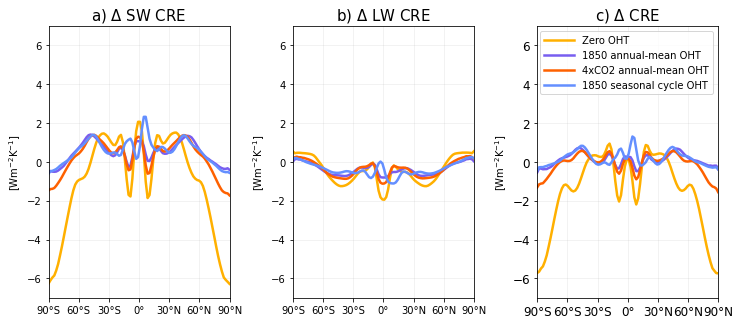

In [27]:
fig, axs = plt.subplots(1,3)
field1 = ds_am["SWCF"]
field2 = ds_am["LWCF"]
field = ds_am["TS"]
field_gm = ds_am_gm["TS"]

plt.tick_params(axis='both', which='major', labelsize=12)

axs[0].plot(ds_am["lat"],(field1[8]-field1[3])/(field_gm[8]-field_gm[3]),color="#FFB000",linewidth=2.5) # Zero OHT
axs[0].plot(ds_am["lat"],(field1[6]-field1[1])/(field_gm[6]-field_gm[1]),color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[0].plot(ds_am["lat"],(field1[5]-field1[0])/(field_gm[5]-field_gm[0]),color="#FE6100",linewidth=2.5) # 4xCO2 OHT
axs[0].plot(ds_am["lat"],(field1[7]-field1[2])/(field_gm[7]-field_gm[2]),color="#648FFF",linewidth=2.5) # 1850 SC OHT
axs[0].set(xlim=(-90,90))
axs[0].set(ylim=[-7,7])
axs[0].title.set_text('a) $\Delta$ SW CRE')
axs[0].set(ylabel="[Wm$^{-2}$K$^{-1}$]")
axs[0].title.set_size(15)
axs[0].set_xticks([-90,-60,-30,0,30,60,90])
lat_formatter = LatitudeFormatter()
axs[0].xaxis.set_major_formatter(lat_formatter)
axs[0].grid(alpha=0.2)

axs[1].plot(ds_am["lat"],(field2[8]-field2[3])/(field_gm[8]-field_gm[3]),color="#FFB000",linewidth=2.5) # Zero OHT
axs[1].plot(ds_am["lat"],(field2[6]-field2[1])/(field_gm[6]-field_gm[1]),color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[1].plot(ds_am["lat"],(field2[5]-field2[0])/(field_gm[5]-field_gm[0]),color="#FE6100",linewidth=2.5) # 4xCO2 OHT
axs[1].plot(ds_am["lat"],(field2[7]-field2[2])/(field_gm[7]-field_gm[2]),color="#648FFF",linewidth=2.5) # 1850 SC OHT
axs[1].set(xlim=(-90,90))
axs[1].set(ylim=[-7,7])
axs[1].title.set_text('b) $\Delta$ LW CRE')
axs[1].set(ylabel="[Wm$^{-2}$K$^{-1}$]")
axs[1].title.set_size(15)
axs[1].set_xticks([-90,-60,-30,0,30,60,90])
axs[1].xaxis.set_major_formatter(lat_formatter)
axs[1].grid(alpha=0.2)


axs[2].plot(ds_am["lat"],(field2[8]-field2[3]+field1[8]-field1[3])/(field_gm[8]-field_gm[3]),color="#FFB000",linewidth=2.5) # Zero OHT
axs[2].plot(ds_am["lat"],(field2[6]-field2[1]+field1[6]-field1[1])/(field_gm[6]-field_gm[1]),color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[2].plot(ds_am["lat"],(field2[5]-field2[0]+field1[5]-field1[0])/(field_gm[5]-field_gm[0]),color="#FE6100",linewidth=2.5) # 4xCO2 OHT
axs[2].plot(ds_am["lat"],(field2[7]-field2[2]+field1[7]-field1[2])/(field_gm[7]-field_gm[2]),color="#648FFF",linewidth=2.5) # 1850 SC OHT
axs[2].set(xlim=(-90,90))
axs[2].set(ylim=[-7,7])
axs[2].title.set_text('c) $\Delta$ CRE')
axs[2].set(ylabel="[Wm$^{-2}$K$^{-1}$]")
axs[2].title.set_size(15)
axs[2].legend(["Zero OHT","1850 annual-mean OHT","4xCO2 annual-mean OHT","1850 seasonal cycle OHT",],fontsize=10,handlelength=3)
axs[2].set_xticks([-90,-60,-30,0,30,60,90])
axs[2].xaxis.set_major_formatter(lat_formatter)
axs[2].grid(alpha=0.2)

fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.2)
fig.set_figheight(5)
fig.set_figwidth(12)

# plt.savefig('Fig5.pdf', bbox_inches='tight')

# Figure 6

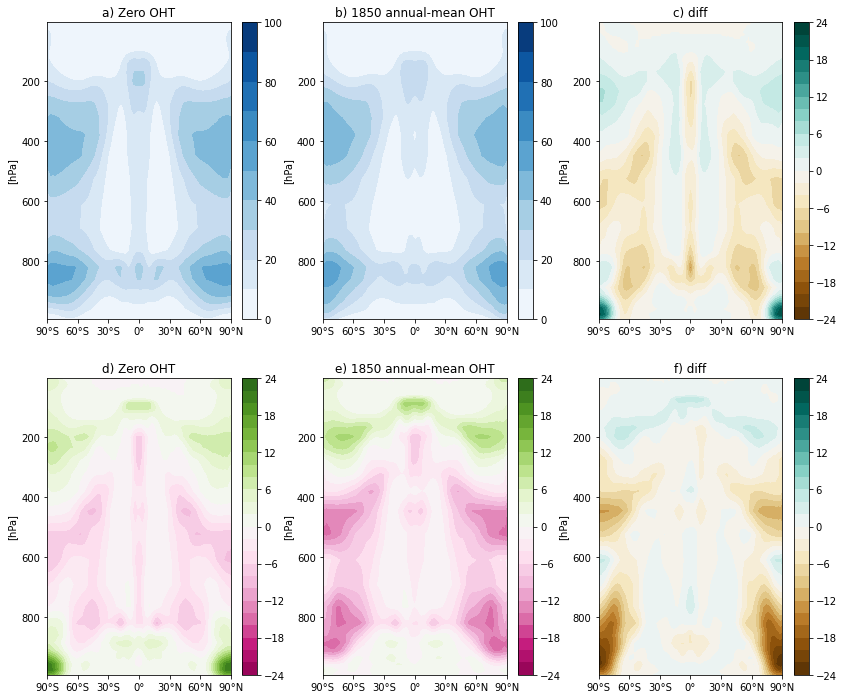

In [28]:
fig, axs = plt.subplots(2,3)

field = ds_am["CLOUD"]*100

# Zero OHT
cx1=axs[0,0].contourf(ds_am["lat"], ds_am["lev"], (field[3]),cmap=plt.cm.Blues\
                      ,levels=np.arange(0,1.1,0.1)*100)
axs[0,0].invert_yaxis()
axs[0,0].title.set_text('a) Zero OHT')
fig.colorbar(cx1,ax=axs[0,0])
axs[0,0].set(ylabel="[hPa]")
axs[0,0].set_xticks([-90,-60,-30,0,30,60,90])
lat_formatter = LatitudeFormatter()
axs[0,0].xaxis.set_major_formatter(lat_formatter)

# 1850 AM OHT
cx1=axs[0,1].contourf(ds_am["lat"], ds_am["lev"], (field[1]),cmap=plt.cm.Blues\
                      ,levels=np.arange(0,1.1,0.1)*100)
axs[0,1].invert_yaxis()
axs[0,1].title.set_text('b) 1850 annual-mean OHT')
fig.colorbar(cx1,ax=axs[0,1])
axs[0,1].set(ylabel="[hPa]")
axs[0,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[0,1].xaxis.set_major_formatter(lat_formatter)

# 1850 AM OHT - Zero OHT
cx1=axs[0,2].contourf(ds_am["lat"], ds_am["lev"], (field[1]-field[3]),cmap=plt.cm.BrBG\
                      ,levels=np.arange(-1.2,1.3,0.1)/5*100)
axs[0,2].invert_yaxis()
axs[0,2].title.set_text('c) diff')
fig.colorbar(cx1,ax=axs[0,2])
axs[0,2].set(ylabel="[hPa]")
axs[0,2].set_xticks([-90,-60,-30,0,30,60,90])
axs[0,2].xaxis.set_major_formatter(lat_formatter)

# Zero OHT
cx1=axs[1,0].contourf(ds_am["lat"], ds_am["lev"], (field[8]-field[3]),cmap=plt.cm.PiYG\
                      ,levels=np.arange(-1.2,1.3,0.1)/5*100)
axs[1,0].invert_yaxis()
axs[1,0].title.set_text('d) Zero OHT')
fig.colorbar(cx1,ax=axs[1,0])
axs[1,0].set(ylabel="[hPa]")
axs[1,0].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,0].xaxis.set_major_formatter(lat_formatter)

# 1850 AM OHT
cx1=axs[1,1].contourf(ds_am["lat"], ds_am["lev"], (field[6]-field[1]),cmap=plt.cm.PiYG\
                      ,levels=np.arange(-1.2,1.3,0.1)/5*100)
axs[1,1].invert_yaxis()
axs[1,1].title.set_text('e) 1850 annual-mean OHT')
fig.colorbar(cx1,ax=axs[1,1])
axs[1,1].set(ylabel="[hPa]")
axs[1,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,1].xaxis.set_major_formatter(lat_formatter)

# 1850 AM OHT - Zero OHT
cx1=axs[1,2].contourf(ds_am["lat"], ds_am["lev"], (field[6]-field[1]-field[8]+field[3]),cmap=plt.cm.BrBG\
                      ,levels=np.arange(-1.2,1.3,0.1)/5*100)
axs[1,2].invert_yaxis()
axs[1,2].title.set_text('f) diff')
fig.colorbar(cx1,ax=axs[1,2])
axs[1,2].set(ylabel="[hPa]")
axs[1,2].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,2].xaxis.set_major_formatter(lat_formatter)


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
fig.set_figheight(12)
fig.set_figwidth(14)

# plt.savefig('Fig6.pdf', bbox_inches='tight')

# Figure 7

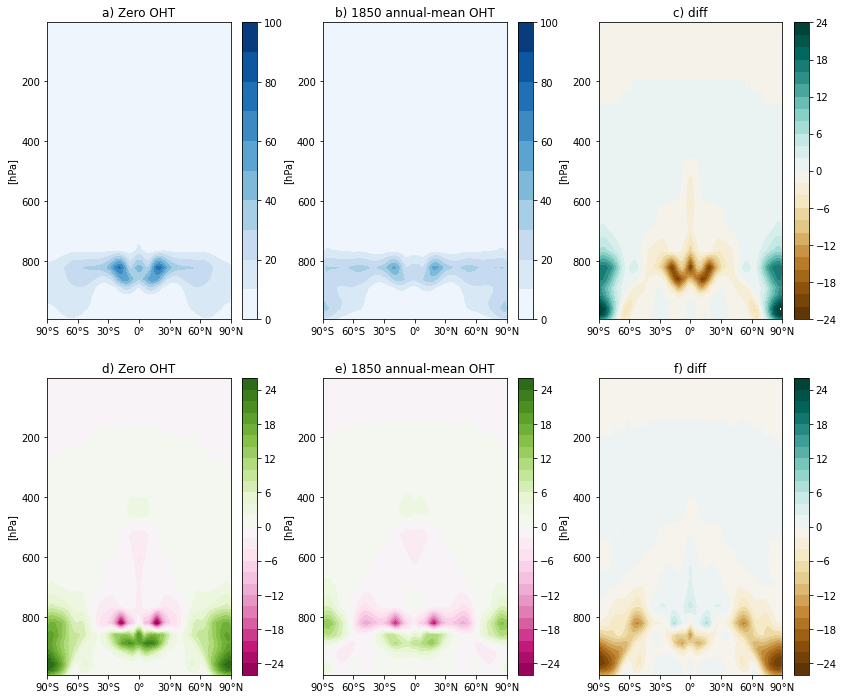

In [29]:
fig, axs = plt.subplots(2,3)

field = ds_am["CLDLIQ"]*1000000

# Zero OHT
cx1=axs[0,0].contourf(ds_am["lat"], ds_am["lev"], (field[3]),cmap=plt.cm.Blues\
                      ,levels=np.arange(0,1.1,0.1)*100)
axs[0,0].invert_yaxis()
axs[0,0].title.set_text('a) Zero OHT')
fig.colorbar(cx1,ax=axs[0,0])
axs[0,0].set(ylabel="[hPa]")
axs[0,0].set_xticks([-90,-60,-30,0,30,60,90])
lat_formatter = LatitudeFormatter()
axs[0,0].xaxis.set_major_formatter(lat_formatter)

# 1850 AM OHT
cx1=axs[0,1].contourf(ds_am["lat"], ds_am["lev"], (field[1]),cmap=plt.cm.Blues\
                      ,levels=np.arange(0,1.1,0.1)*100)
axs[0,1].invert_yaxis()
axs[0,1].title.set_text('b) 1850 annual-mean OHT')
fig.colorbar(cx1,ax=axs[0,1])
axs[0,1].set(ylabel="[hPa]")
axs[0,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[0,1].xaxis.set_major_formatter(lat_formatter)

# 1850 AM OHT - Zero OHT
cx1=axs[0,2].contourf(ds_am["lat"], ds_am["lev"], (field[1]-field[3]),cmap=plt.cm.BrBG\
                      ,levels=np.arange(-1.2,1.3,0.1)/5*100)
axs[0,2].invert_yaxis()
axs[0,2].title.set_text('c) diff')
fig.colorbar(cx1,ax=axs[0,2])
axs[0,2].set(ylabel="[hPa]")
axs[0,2].set_xticks([-90,-60,-30,0,30,60,90])
axs[0,2].xaxis.set_major_formatter(lat_formatter)

# Zero OHT
cx1=axs[1,0].contourf(ds_am["lat"], ds_am["lev"], (field[8]-field[3]),cmap=plt.cm.PiYG\
                      ,levels=np.arange(-1.3,1.4,0.1)/5*100)
axs[1,0].invert_yaxis()
axs[1,0].title.set_text('d) Zero OHT')
fig.colorbar(cx1,ax=axs[1,0])
axs[1,0].set(ylabel="[hPa]")
axs[1,0].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,0].xaxis.set_major_formatter(lat_formatter)

# 1850 AM OHT
cx1=axs[1,1].contourf(ds_am["lat"], ds_am["lev"], (field[6]-field[1]),cmap=plt.cm.PiYG\
                      ,levels=np.arange(-1.3,1.4,0.1)/5*100)
axs[1,1].invert_yaxis()
axs[1,1].title.set_text('e) 1850 annual-mean OHT')
fig.colorbar(cx1,ax=axs[1,1])
axs[1,1].set(ylabel="[hPa]")
axs[1,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,1].xaxis.set_major_formatter(lat_formatter)

# 1850 AM OHT - Zero OHT
cx1=axs[1,2].contourf(ds_am["lat"], ds_am["lev"], (field[6]-field[1]-field[8]+field[3]),cmap=plt.cm.BrBG\
                      ,levels=np.arange(-1.3,1.4,0.1)/5*100)
axs[1,2].invert_yaxis()
axs[1,2].title.set_text('f) diff')
fig.colorbar(cx1,ax=axs[1,2])
axs[1,2].set(ylabel="[hPa]")
axs[1,2].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,2].xaxis.set_major_formatter(lat_formatter)


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.2)
fig.set_figheight(12)
fig.set_figwidth(14)

# plt.savefig('Fig7.pdf', bbox_inches='tight')

# Figure 8

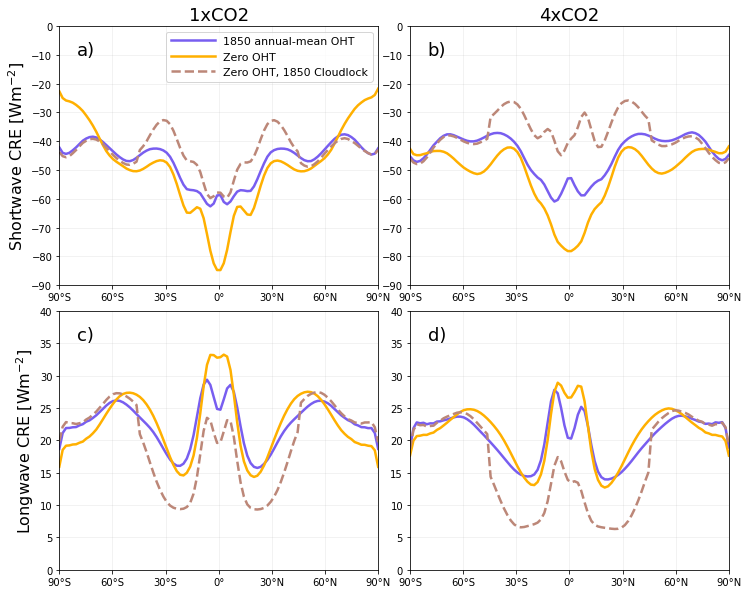

In [34]:
field = ds_am["SWCF"]

fig, axs = plt.subplots(2,2)
axs[0,0].plot(ds_am["lat"],field[1],color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[0,0].plot(ds_am["lat"],field[3],color="#FFB000",linewidth=2.5) # Zero OHT
axs[0,0].plot(ds_am["lat"],field[4],color="#BC8778",linewidth=2.5,linestyle="dashed") # 1850 clouds Zero OHT
axs[0,0].set(xlim=(-90,90))
axs[0,0].set(ylim=(-90,0))
axs[0,0].title.set_text('1xCO2')
axs[0,0].title.set_size(18)
axs[0,0].set(ylabel="Shortwave CRE [Wm$^{-2}$]",)
axs[0,0].yaxis.get_label().set_fontsize(16)
axs[0,0].legend(["1850 annual-mean OHT","Zero OHT","Zero OHT, 1850 Cloudlock"],fontsize=11,handlelength=4)
axs[0,0].text(-80,-10,'a)',fontsize=18)
axs[0,0].set_xticks([-90,-60,-30,0,30,60,90])
lat_formatter = LatitudeFormatter()
axs[0,0].xaxis.set_major_formatter(lat_formatter)
axs[0,0].grid(alpha=0.2)

axs[0,1].plot(ds_am["lat"],field[1+5],color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[0,1].plot(ds_am["lat"],field[3+5],color="#FFB000",linewidth=2.5) # Zero OHT
axs[0,1].plot(ds_am["lat"],field[4+5],color="#BC8778",linewidth=2.5,linestyle="dashed") # 1850 clouds Zero OHT
axs[0,1].set(xlim=(-90,90))
axs[0,1].set(ylim=(-90,0))
axs[0,1].title.set_text('4xCO2')
axs[0,1].title.set_size(18)
axs[0,1].text(-80,-10,'b)',fontsize=18)
axs[0,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[0,1].xaxis.set_major_formatter(lat_formatter)
axs[0,1].grid(alpha=0.2)

field = ds_am["LWCF"]

axs[1,0].plot(ds_am["lat"],field[1],color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[1,0].plot(ds_am["lat"],field[3],color="#FFB000",linewidth=2.5) # Zero OHT
axs[1,0].plot(ds_am["lat"],field[4],color="#BC8778",linewidth=2.5,linestyle="dashed") # 1850 clouds Zero OHT
axs[1,0].set(xlim=(-90,90))
axs[1,0].set(ylim=(0,40))
axs[1,0].yaxis.get_label().set_fontsize(16)
axs[1,0].set(ylabel="Longwave CRE [Wm$^{-2}$]")
axs[1,0].text(-80,35.5,'c)',fontsize=18)
axs[1,0].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,0].xaxis.set_major_formatter(lat_formatter)
axs[1,0].grid(alpha=0.2)

axs[1,1].plot(ds_am["lat"],field[1+5],color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[1,1].plot(ds_am["lat"],field[3+5],color="#FFB000",linewidth=2.5) # Zero OHT
axs[1,1].plot(ds_am["lat"],field[4+5],color="#BC8778",linewidth=2.5,linestyle="dashed") # 1850 clouds Zero OHT
axs[1,1].set(xlim=(-90,90))
axs[1,1].set(ylim=(0,40))
axs[1,1].text(-80,35.5,'d)',fontsize=18)
axs[1,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[1,1].xaxis.set_major_formatter(lat_formatter)
axs[1,1].grid(alpha=0.2)

fig.set_figheight(10)
fig.set_figwidth(12)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.1)

# plt.savefig('Fig8.pdf', bbox_inches='tight')

# Figure 9

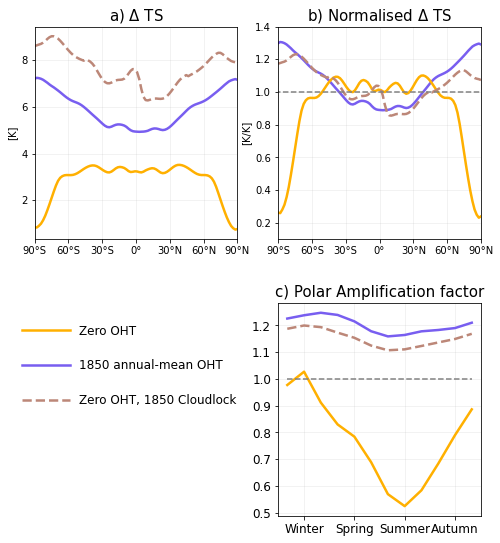

In [35]:
field = ds_am["TS"]
field_gm = ds_am_gm["TS"]

y1 = [0,8]

fig, axs = plt.subplots(2,2)

plt.tick_params(axis='both', which='major', labelsize=12)

axs[0,0].plot(ds_am["lat"],field[6]-field[1],color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[0,0].plot(ds_am["lat"],field[8]-field[3],color="#FFB000",linewidth=2.5) # Zero OHT
axs[0,0].plot(ds_am["lat"],field[9]-field[4],color="#BC8778",linewidth=2.5,linestyle="dashed") # 1850 clouds Zero OHT
axs[0,0].set(xlim=(-90,90))
axs[0,0].title.set_text('a) $\Delta$ TS')
axs[0,0].set(ylabel="[K]")
axs[0,0].title.set_size(15)
axs[0,0].set_xticks([-90,-60,-30,0,30,60,90])
lat_formatter = LatitudeFormatter()
axs[0,0].xaxis.set_major_formatter(lat_formatter)
axs[0,0].grid(alpha=0.2)

axs[0,1].plot(ds_am["lat"],(field[6]-field[1])/(field_gm[6]-field_gm[1]),color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[0,1].plot(ds_am["lat"],(field[8]-field[3])/(field_gm[8]-field_gm[3]),color="#FFB000",linewidth=2.5) # Zero OHT
axs[0,1].plot(ds_am["lat"],(field[9]-field[4])/(field_gm[9]-field_gm[4]),color="#BC8778",linewidth=2.5,linestyle="dashed") # 1850 clouds Zero OHT
axs[0,1].set(xlim=(-90,90))
axs[0,1].set(ylim=[0.1,1.4])
axs[0,1].title.set_text('b) Normalised $\Delta$ TS')
axs[0,1].set(ylabel="[K/K]")
axs[0,1].hlines(y=1.0,xmin=-100,xmax=100,color="grey",linestyle="dashed")
axs[0,1].title.set_size(15)
axs[0,1].set_xticks([-90,-60,-30,0,30,60,90])
axs[0,1].xaxis.set_major_formatter(lat_formatter)
axs[0,1].grid(alpha=0.2)


field1=ds["TS"][:,:,80:96].weighted(weights).mean('lat')
field2=ds2["TS"][:,:,0:16].weighted(weights).mean('lat')
field3 = field1[:,0:6]+field2[:,6:12]
field4 = field1[:,6:12]+field2[:,0:6]
field=field1
field[:,0:6] = field3/2.0
field[:,6:12] = field4/2.0

axs[1,0].axis('off')

axs[1,1].plot(np.arange(1,13,1),(field[8]-field[3])/(field_gm[8]-field_gm[3]),color="#FFB000",linewidth=2.5) # Zero OHT
axs[1,1].plot(np.arange(1,13,1),(field[6]-field[1])/(field_gm[6]-field_gm[1]),color="#785EF0",linewidth=2.5) # 1850 AM OHT
axs[1,1].plot(np.arange(1,13,1),(field[9]-field[4])/(field_gm[9]-field_gm[4]),color="#BC8778",linewidth=2.5,linestyle="dashed")  # 1850 clouds Zero OHT
# #64ffd3

axs[1,1].title.set_text('c) Polar Amplification factor')
axs[1,1].title.set_size(15)
axs[1,1].legend(["Zero OHT","1850 annual-mean OHT","Zero OHT, 1850 Cloudlock",],bbox_to_anchor=(-0.15, 0.95),\
                frameon=False,fontsize=12,labelspacing=1.8,handlelength=4)
axs[1,1].set(xticks=[2,5,8,11],xticklabels=["Winter","Spring","Summer","Autumn"])
axs[1,1].hlines(y=1.0,xmin=1,xmax=12,color="grey",linestyle="dashed")
axs[1,1].grid(alpha=0.2)


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
fig.set_figheight(9)
fig.set_figwidth(8)

# plt.savefig('Fig9.pdf', bbox_inches='tight')

# Figure 3

In [36]:
#!/software/anaconda3/bin

cday    = 86400.0         # sec in calendar day ~ sec
cyear   = cday*365.25     # sec in calendar year ~ sec
cpsw    = 3.996e3         # specific heat of sea water ~ J/kg/K
rhosw   = 1.026e3         # density of sea water ~ kg/m^3

def heatcapacity(h): 

  """
  Calculate mixed-layer heat capcity in units 
  W yr m^-2 K^-1 given depth in m
  """

  heat_capacity = cpsw*rhosw*h 

  heat_capacity = heat_capacity / cyear

  return heat_capacity

def depth(C): 

  """
  Calculate mixed-layer depth given heat capcity
  in units of W yr m^-2 K^-1
  """
  C = C * cyear # convert to Joules

  depth = C/(cpsw*rhosw)

  return depth 

def main():

  print(f'Mixed layer depth is {depth(9.8)}')
 
  print(f'Mixed layer heat capacity is {heatcapacity(30)}')

if __name__ == '__main__':
  main()

Mixed layer depth is 75.4322743796428
Mixed layer heat capacity is 3.897535934291581


In [37]:
#!/software/anaconda3/bin

""" 

Moist Energy Balance Model with a seasonal cycle of insolation and a
thermodynamic sea ice model, as described in the paper:

Feldl, N., and T. M. Merlis (2021), Polar amplification in idealized 
climates: the role of ice, moisture, and seasons

This code is based off the Dry EBM presented in the paper:

Wagner, T.J. and I. Eisenman, 2015: How Climate Model Complexity 
Influences Sea Ice Stability. J. Climate, 28, 3998–4014, 
https://doi.org/10.1175/JCLI-D-14-00654.1

with the following modifications:
- We have added the effect of latent energy on the diffusive 
  representation of atmospheric energy transport
- We have added functionality for disabling the effect of sea-ice 
  thermodynamics, the seasonal cycle of insolation, ice-albedo
  feedback, and latent energy transport.
- We use a global, rather than single-hemisphere, domain.

"""

import sys
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time
start_time = time.time()
import matplotlib.gridspec as gridspec
import matplotlib as mpl

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cftime
from scipy.misc import derivative
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

def saturation_specific_humidity(temp,press):

  """
  We assume a single liquid-to-vapor phase transition with the parameter values 
  of the Clausius Clapeyron (CC) relation given in OGorman and Schneider (2008) 
  to determine the saturation specific humidity qs(T).

  """

  es0 = 610.78 # saturation vapor pressure at t0 (Pa)
  t0 = 273.16
  Rv = 461.5
  Lv = 2.5E6
  ep = 0.622 # ratio of gas constants of dry air and water vapor
  temp = temp + 273.15 # convert to Kelvin
  es = es0 * np.exp(-(Lv/Rv) * ((1/temp)-(1/t0)))
  qs = ep * es / press

  return qs

def saturation_specific_humidity_derivative(temp,press):

  """
  We assume a single liquid-to-vapor phase transition with the parameter values 
  of the Clausius Clapeyron (CC) relation given in OGorman and Schneider (2008) 
  to determine the saturation specific humidity qs(T).

  """

  es0 = 610.78 # saturation vapor pressure at t0 (Pa)
  t0 = 273.16
  Rv = 461.5
  Lv = 2.5E6
  ep = 0.622 # ratio of gas constants of dry air and water vapor
  temp = temp + 273.15 # convert to Kelvin
  
  A = es0 * ep / press
  C = Lv/Rv
  B = A*np.exp(C/t0)
  qs_T = B/temp**2*(C*np.exp(-C/temp))
  

  return qs_T

def saturation_specific_humidity_second_derivative(temp,press):

  """
  We assume a single liquid-to-vapor phase transition with the parameter values 
  of the Clausius Clapeyron (CC) relation given in OGorman and Schneider (2008) 
  to determine the saturation specific humidity qs(T).

  """

  es0 = 610.78 # saturation vapor pressure at t0 (Pa)
  t0 = 273.16
  Rv = 461.5
  Lv = 2.5E6
  ep = 0.622 # ratio of gas constants of dry air and water vapor
  temp = temp + 273.15 # convert to Kelvin
  
  A = es0 * ep / press
  C = Lv/Rv
  B = A*np.exp(C/t0)
  qs_TT = B/temp**4*(C*np.exp(-C/temp))*(C-2*temp)
  

  return qs_TT


def model(grid, T, F=0, Fb=0, moist = 0, albT = 0, seas = 0, thermo = 0):

  if moist==0:
    D = 0.6 # diffusivity for heat transport (W m^-2 K^-1)
  elif moist==1:
    D = 0.3 # diffusivity for heat transport (W m^-2 K^-1)
  print(f'diffusivity for heat transport is {D} W m^-2 K^-1')
  S1 = 338 # insolation seasonal dependence (W m^-2)
  A = 210 # OLR when T = 0 (W m^-2)
  B = 1.8 # OLR temperature dependence (W m^-2 K^-1)
#   cw = 9.8 # ocean mixed layer heat capacity (W yr m^-2 K^-1)
  cw = heatcapacity(60) # ocean mixed layer heat capacity (W yr m^-2 K^-1)
  S0 = 340 # insolation at equator (W m^-2)
  S2 = 240 # insolation spatial dependence (W m^-2)
#   a0 = 0.7 # ice-free co-albedo at equator
#   a2 = 0.1 # ice=free co-albedo spatial dependence
#   ai = 0.4 # co-albedo where there is sea ice
#   Fb = 0 # heat flux from ocean below (W m^-2)
  k = 2 # sea ice thermal conductivity (W m^-1 K^-1)
  Lf = 9.5 # sea ice latent heat of fusion (W yr m^-3)
  cg = 0.098 #0.01*cw # ghost layer heat capacity(W yr m^-2 K^-1)
  tau = 1e-5 # ghost layer coupling timescale (yr)
  Lv = 2.5E6 # latent heat of vaporization (J kg^-1)
  cp = 1004.6 # heat capacity of air at constant pressure (J kg^-1 K^-1)
  RH = 0.8 # relative humidity
  Ps = 1E5 # surface pressure (Pa)
    
  gamma = 0.482 # empirical insolation structure
  Q = 1360 # solar constant (W m^-2)
  a0 = 0.68
  a2 = -0.2 # These two values are from North 1981

  # Read grid dict
  n = grid['n']; dx = grid['dx']; x = grid['x']; xb = grid['xb']
  nt = grid['nt']; dur = grid['dur']; dt = grid['dt']
  print(f'Running model for {n} grid cells and {dur} years ...')

  # Diffusion Operator (WE15, Appendix A) 
  lam = D/dx**2*(1-xb**2)
  L1=np.append(0, -lam) 
  L2=np.append(-lam, 0) 
  L3=-L1-L2
  diffop = - np.diag(L3) - np.diag(L2[:n-1],1) - np.diag(L1[1:n],-1)

  # Definitions for implicit scheme on Tg
  cg_tau = cg/tau
  dt_tau = dt/tau
  dc = dt_tau*cg_tau
  kappa = (1+dt_tau)*np.identity(n)-dt*diffop/cg

  # Seasonal forcing (WE15 eq.3)
  if seas == 0:
    S1 = 0.0

  ty = np.arange(dt/2,1+dt/2,dt)
  S = (1+0.5*gamma*(1-3*x**2))

  # zero out negative insolation
  S = np.where(S<0,0,S)

  # Further definitions
  M = B+cg_tau
  aw = a0-a2*x**2 # open water albedo
  kLf = k*Lf

  # Set up output arrays
  Efin = np.zeros((n,nt)) 
  Tfin = np.zeros((n,nt))
  T0fin = np.zeros((n,nt))
  ASRfin = np.zeros((n,nt))
  tfin = np.linspace(0,1,nt)

  # Initial conditions
  Tg = T
  E = cw*T

  # Integration (see WE15_NumericIntegration.pdf)
  # Loop over Years 
  for years in range(dur):
    # Loop within One Year
    for i in range(nt):

      # forcing
#       if albT == 1:
#         alpha = aw*(E>0) + ai*(E<0) #WE15, eq.4
#       else:
#         alpha = aw
      alpha = a0 + a2/2*(3*x**2-1)

      C = alpha*S*Q/4 + cg_tau*Tg - A + F

      # surface temperature
      if thermo == 1:
        T0 = C/(M-kLf/E) #WE15, eq.A3
      else:
        T0 = E/cw

      # store final year 
      if years==(dur-1): 
        Efin[:,i] = E
        Tfin[:,i] = T
        T0fin[:,i] = T0
        ASRfin[:,i] = alpha*S*Q/4

      # T = E/cw*(E>=0)+T0*(E<0)*(T0<0) #WE15, eq.9
      # I HAVE CHANGED THIS LINE SO THAT THERE IS NO SEA ICE
      T = E/cw
    
      # Forward Euler on E
      E = E+dt*(C-M*T+Fb) #WE15, eq.A2

      # Implicit Euler on Tg
      if moist == 1:

        # Forward Euler on diffusion of latent heat
        q = RH * saturation_specific_humidity(Tg,Ps)
        rhs1 = np.matmul(dt*diffop/cg, Lv*q/cp)

        if thermo == 1:
        # FM21, eq. 3
            Tg = Tg
#           Tg = np.linalg.solve(kappa-np.diag(dc/(M-kLf/E)*(T0<0)*(E<0)),
#                                Tg + rhs1 + (dt_tau*(E/cw*(E>=0)+(ai*S[i,:]-A+F)/(M-kLf/E)*(T0<0)*(E<0))))
        else:
          Tg = np.linalg.solve(kappa,
                               Tg + rhs1 + dt_tau*(E/cw) )

      elif moist == 0:
        if thermo ==1:
        #WE15, eq. A1
            Tg = Tg
#           Tg = np.linalg.solve(kappa-np.diag(dc/(M-kLf/E)*(T0<0)*(E<0)),
#                                Tg + (dt_tau*(E/cw*(E>=0)+(ai*S[i,:]-A+F)/(M-kLf/E)*(T0<0)*(E<0))))
        else:
          Tg = np.linalg.solve(kappa,
                               Tg + dt_tau*(E/cw) )

  print(f'{np.mean(Tfin, axis=(0,1))} global mean temp')
  print(f'{np.ptp(np.mean(Tfin, axis=1))} equator-pole temp difference')
  print(f'{np.mean(ASRfin, axis=(0,1)) - A + F - B*np.mean(Tfin, axis=(0,1))+np.mean(Fb, axis=(0))} energy balance')

  return tfin, Tfin


In [38]:
# Interpolate the qflux onto same grid
qflux_1850 = ds_som.qdp[2,0,:,0]
n = 180
dx = 2./n #grid box width
x = np.linspace(-1+dx/2,1-dx/2,n) #native grid
lat = ds_som.lat
lat_x = np.sin(np.deg2rad(lat))
qflux_1850_interp = np.interp(x,lat_x,-qflux_1850)

In [39]:
# Set up grid and time-stepping
n = 180
dx = 2./n #grid box width
x = np.linspace(-1+dx/2,1-dx/2,n) #native grid
xb = np.linspace(-1+dx,1-dx,n-1) 
nt = 1000
dur= 100
dt = 1./nt
grid = {'n': n, 'dx': dx, 'x': x, 'xb': xb, 'nt': nt, 'dur': dur, 'dt': dt} 
    
# Integrate EBM
Ti = 7.5+20*(1-2*x**2) # initial condition 
F = 0
Fb = qflux_1850_interp
#     Fb = Fb - np.mean(Fb, axis=(0))
tfin, Tfin_Q1850_F0 = model(grid, Ti, F, Fb, moist = 1, albT = 0, seas = 0, thermo = 0)
F = 3.6*2 # (W m^-2)
tfin, Tfin_Q1850_F4 = model(grid, Ti, F, Fb, moist = 1, albT = 0, seas = 0, thermo = 0)
    
F = 0
Fb = Fb - Fb
tfin, Tfin_Qzero_F0 = model(grid, Ti, F, Fb, moist = 1, albT = 0, seas = 0, thermo = 0)
F = 3.6*2 # (W m^-2)
tfin, Tfin_Qzero_F4 = model(grid, Ti, F, Fb, moist = 1, albT = 0, seas = 0, thermo = 0)
    
print("--- %s seconds ---" % (time.time() - start_time))

# Calculate the approximation from Legendre Polynomial
Qzero_LP2 = np.polynomial.legendre.legfit(x,Tfin_Qzero_F0[:,-1],8)[2]
Qzero_F4_LP2 = np.polynomial.legendre.legfit(x,Tfin_Qzero_F4[:,-1],8)[2]
Q1850_LP2 = np.polynomial.legendre.legfit(x,Tfin_Q1850_F0[:,-1],8)[2]
Q1850_F4_LP2 = np.polynomial.legendre.legfit(x,Tfin_Q1850_F4[:,-1],8)[2]
Q1850_qstarT = saturation_specific_humidity_derivative(Tfin_Q1850_F0[:,-1],1e5)
Qzero_qstarT = saturation_specific_humidity_derivative(Tfin_Qzero_F0[:,-1],1e5)
Q1850_qstarTT = saturation_specific_humidity_second_derivative(np.mean(Tfin_Q1850_F0[:,-1]),1e5)
Qzero_qstarTT = saturation_specific_humidity_second_derivative(np.mean(Tfin_Qzero_F0[:,-1]),1e5)
P2 = 0.5*(3*x**2-1)
dxP2 = 3*x
B = 1.8
Lv = 2.5E6 # latent heat of vaporization (J kg^-1)
D = 0.3 # diffusivity for heat transport (W m^-2 K^-1)
RH = 0.8 # relative humidity
cp = 1004.6 # heat capacity of air at constant pressure (J kg^-1 K^-1)
Qzero_eta = 1+Lv*RH/cp*Qzero_qstarT
Q1850_eta = 1+Lv*RH/cp*Q1850_qstarT
Qzero_Dprime = -5/6*D*sum(dx*(P2[90:180] * np.gradient(Qzero_eta[90:180]*(1-x[90:180]**2)*dxP2[90:180],dx)))
Q1850_Dprime = -5/6*D*sum(dx*(P2[90:180] * np.gradient(Q1850_eta[90:180]*(1-x[90:180]**2)*dxP2[90:180],dx)))
Qzero_PA_est = -6*Qzero_LP2*D*Lv*RH/cp*Qzero_qstarTT/(6*Qzero_Dprime+B)
Q1850_PA_est = -6*Q1850_LP2*D*Lv*RH/cp*Q1850_qstarTT/(6*Q1850_Dprime+B)

diffusivity for heat transport is 0.3 W m^-2 K^-1
Running model for 180 grid cells and 100 years ...
15.419947168214195 global mean temp
41.47626028896329 equator-pole temp difference
3.1080773501765413e-10 energy balance
diffusivity for heat transport is 0.3 W m^-2 K^-1
Running model for 180 grid cells and 100 years ...
19.41994716766149 global mean temp
38.00140494578969 equator-pole temp difference
1.305681251919516e-09 energy balance
diffusivity for heat transport is 0.3 W m^-2 K^-1
Running model for 180 grid cells and 100 years ...
15.420531965914165 global mean temp
46.690290949260984 equator-pole temp difference
3.1085889418136503e-10 energy balance
diffusivity for heat transport is 0.3 W m^-2 K^-1
Running model for 180 grid cells and 100 years ...
19.420531965360937 global mean temp
42.92771230898665 equator-pole temp difference
1.306673880208109e-09 energy balance
--- 229.96678400039673 seconds ---


In [40]:
fnames='CAM6AquaSOM_noice_*xCO2_*.lon.cam.h0.0020-0120.nc'
ds6 = xr.open_mfdataset(path+fnames,decode_times=True,concat_dim='ensemble',combine='nested')
ds6 = ds6.drop('lon')
ds6_am = ds6.mean('time')
weights = np.cos(np.deg2rad(ds6.lat))
ds6_am_gm = ds6_am.weighted(weights).mean('lat')
field = ds6_am["TS"]-273.15

CAM6_Qzero_LP2 = np.polynomial.legendre.legfit(x,np.interp(x,lat_x,field[3]),8)[2]
CAM6_Qzero_F4_LP2 = np.polynomial.legendre.legfit(x,np.interp(x,lat_x,field[7]),8)[2]
CAM6_Q1850_LP2 = np.polynomial.legendre.legfit(x,np.interp(x,lat_x,field[1]),8)[2]
CAM6_Q1850_F4_LP2 = np.polynomial.legendre.legfit(x,np.interp(x,lat_x,field[5]),8)[2]
CAM6_Q1850_qstarT = saturation_specific_humidity_derivative(np.interp(x,lat_x,field[1]),1e5)
CAM6_Qzero_qstarT = saturation_specific_humidity_derivative(np.interp(x,lat_x,field[3]),1e5)
CAM6_Q1850_qstarTT = saturation_specific_humidity_second_derivative(np.mean(np.interp(x,lat_x,field[1])),1e5)
CAM6_Qzero_qstarTT = saturation_specific_humidity_second_derivative(np.mean(np.interp(x,lat_x,field[3])),1e5)
P2 = 0.5*(3*x**2-1)
dxP2 = 3*x
B = 1.8
Lv = 2.5E6 # latent heat of vaporization (J kg^-1)
D = 0.3 # diffusivity for heat transport (W m^-2 K^-1)
RH = 0.8 # relative humidity
cp = 1004.6 # heat capacity of air at constant pressure (J kg^-1 K^-1)
CAM6_Qzero_eta = 1+Lv*RH/cp*CAM6_Qzero_qstarT
CAM6_Q1850_eta = 1+Lv*RH/cp*CAM6_Q1850_qstarT
CAM6_Qzero_Dprime = -5/6*D*sum(dx*(P2[90:180] * np.gradient(CAM6_Qzero_eta[90:180]*(1-x[90:180]**2)*dxP2[90:180],dx)))
CAM6_Q1850_Dprime = -5/6*D*sum(dx*(P2[90:180] * np.gradient(CAM6_Q1850_eta[90:180]*(1-x[90:180]**2)*dxP2[90:180],dx)))
CAM6_Qzero_PA_est = -6*CAM6_Qzero_LP2*D*Lv*RH/cp*CAM6_Qzero_qstarTT/(6*CAM6_Qzero_Dprime+B)
CAM6_Q1850_PA_est = -6*CAM6_Q1850_LP2*D*Lv*RH/cp*CAM6_Q1850_qstarTT/(6*CAM6_Q1850_Dprime+B)

In [41]:
fnames='CAM5AquaSOM_noice_*xCO2_*.lon.cam.h0.0020-0120.nc'
ds5 = xr.open_mfdataset(path+fnames,decode_times=True,concat_dim='ensemble',combine='nested')
ds5 = ds5.drop('lon')
ds5_am = ds5.mean('time')
weights = np.cos(np.deg2rad(ds5.lat))
ds5_am_gm = ds5_am.weighted(weights).mean('lat')
field5 = ds5_am["TS"]-273.15

CAM5_Qzero_LP2 = np.polynomial.legendre.legfit(x,np.interp(x,lat_x,field5[1]),8)[2]
CAM5_Qzero_F4_LP2 = np.polynomial.legendre.legfit(x,np.interp(x,lat_x,field5[3]),8)[2]
CAM5_Q1850_LP2 = np.polynomial.legendre.legfit(x,np.interp(x,lat_x,field5[0]),8)[2]
CAM5_Q1850_F4_LP2 = np.polynomial.legendre.legfit(x,np.interp(x,lat_x,field5[2]),8)[2]
CAM5_Q1850_qstarT = saturation_specific_humidity_derivative(np.interp(x,lat_x,field5[0]),1e5)
CAM5_Qzero_qstarT = saturation_specific_humidity_derivative(np.interp(x,lat_x,field5[1]),1e5)
CAM5_Q1850_qstarTT = saturation_specific_humidity_second_derivative(np.mean(np.interp(x,lat_x,field5[0])),1e5)
CAM5_Qzero_qstarTT = saturation_specific_humidity_second_derivative(np.mean(np.interp(x,lat_x,field5[1])),1e5)
P2 = 0.5*(3*x**2-1)
dxP2 = 3*x
B = 1.8
Lv = 2.5E6 # latent heat of vaporization (J kg^-1)
D = 0.3 # diffusivity for heat transport (W m^-2 K^-1)
RH = 0.8 # relative humidity
cp = 1004.6 # heat capacity of air at constant pressure (J kg^-1 K^-1)
CAM5_Qzero_eta = 1+Lv*RH/cp*CAM5_Qzero_qstarT
CAM5_Q1850_eta = 1+Lv*RH/cp*CAM5_Q1850_qstarT
CAM5_Qzero_Dprime = -5/6*D*sum(dx*(P2[90:180] * np.gradient(CAM5_Qzero_eta[90:180]*(1-x[90:180]**2)*dxP2[90:180],dx)))
CAM5_Q1850_Dprime = -5/6*D*sum(dx*(P2[90:180] * np.gradient(CAM5_Q1850_eta[90:180]*(1-x[90:180]**2)*dxP2[90:180],dx)))
CAM5_Qzero_PA_est = -6*CAM5_Qzero_LP2*D*Lv*RH/cp*CAM5_Qzero_qstarTT/(6*CAM5_Qzero_Dprime+B)
CAM5_Q1850_PA_est = -6*CAM5_Q1850_LP2*D*Lv*RH/cp*CAM5_Q1850_qstarTT/(6*CAM5_Q1850_Dprime+B)

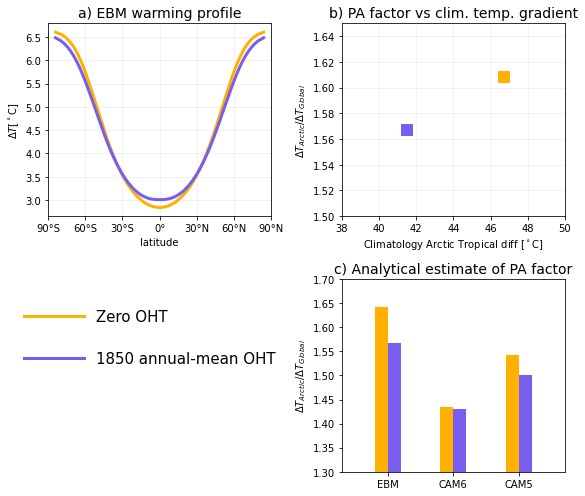

In [43]:
fig, axs = plt.subplots(2,2)
lat = np.arcsin(x)*180/np.pi
axs[0,0].plot(lat,Tfin_Qzero_F4[:,-1]-Tfin_Qzero_F0[:,-1],color="#FFB000",linewidth=3,label="Zero OHT")
axs[0,0].plot(lat,Tfin_Q1850_F4[:,-1]-Tfin_Q1850_F0[:,-1],color="#785EF0",linewidth=3,label="1850 annual-mean OHT")
axs[0,0].set(xlabel="latitude", ylabel="$\Delta T [^\circ$C]")
axs[0,0].title.set_text('a) EBM warming profile')
axs[0,0].title.set_size(14)
axs[0,0].set(xlim=(-90,90))
axs[0,0].set_xticks([-90,-60,-30,0,30,60,90])
lat_formatter = LatitudeFormatter()
axs[0,0].xaxis.set_major_formatter(lat_formatter)
axs[0,0].grid(alpha=0.2)


axs[0,1].scatter([np.ptp(Tfin_Qzero_F0[:,-1]),np.ptp(Tfin_Q1850_F0[:,-1])],
            [np.average(Tfin_Qzero_F4[0:7,-1]-Tfin_Qzero_F0[0:7,-1])/np.average(Tfin_Qzero_F4[:,-1]-Tfin_Qzero_F0[:,-1]),
             np.average(Tfin_Q1850_F4[0:7,-1]-Tfin_Q1850_F0[0:7,-1])/np.average(Tfin_Q1850_F4[:,-1]-Tfin_Q1850_F0[:,-1])],
            s=[120,120],c=["#FFB000","#785EF0"],marker="s")
axs[0,1].set(xlabel="Climatology Arctic Tropical diff [$^\circ$C]", ylabel="$\Delta T_{Arctic} / \Delta T_{Global}$")
axs[0,1].set(xlim=(38,50))
axs[0,1].set(ylim=[1.5,1.65])
axs[0,1].title.set_text('b) PA factor vs clim. temp. gradient')
axs[0,1].title.set_size(14)
axs[0,1].grid(alpha=0.2)

Qzero_PT = np.average((Qzero_PA_est*2*P2+2)[0:7])/np.average(Qzero_PA_est*2*P2+2)
Q1850_PT = np.average((Q1850_PA_est*2*P2+2)[0:7])/np.average(Q1850_PA_est*2*P2+2)
CAM6_Qzero_PT = np.average((CAM6_Qzero_PA_est*2*P2+2)[0:7])/np.average(CAM6_Qzero_PA_est*2*P2+2)
CAM6_Q1850_PT = np.average((CAM6_Q1850_PA_est*2*P2+2)[0:7])/np.average(CAM6_Q1850_PA_est*2*P2+2)
CAM5_Qzero_PT = np.average((CAM5_Qzero_PA_est*2*P2+2)[0:7])/np.average(CAM5_Qzero_PA_est*2*P2+2)
CAM5_Q1850_PT = np.average((CAM5_Q1850_PA_est*2*P2+2)[0:7])/np.average(CAM5_Q1850_PA_est*2*P2+2)
axs[1,1].bar([0,0.1, 0.5,0.6, 1.0,1.1],[Qzero_PT,Q1850_PT,CAM6_Qzero_PT,CAM6_Q1850_PT,CAM5_Qzero_PT,CAM5_Q1850_PT],align='center',width=0.1,color=["#FFB000","#785EF0"])
axs[1,1].set(xticks=[0.05,0.55,1.05],xticklabels=["EBM","CAM6","CAM5"])
axs[1,1].set(xlim=(-0.3,1.4))
axs[1,1].set(ylim=(1.3,1.7))
axs[1,1].set(ylabel='$\Delta T_{Arctic} / \Delta T_{Global}$')
axs[1,1].title.set_text('c) Analytical estimate of PA factor')
axs[1,1].title.set_size(14)


axs[1,0].axis('off')

lines_labels = [axs[0,0].get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc=(0.03, 0.25),frameon=False,fontsize=15,handlelength=4,labelspacing=1.8)


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3,)
fig.set_figheight(7)
fig.set_figwidth(8)

plt.tight_layout() 
# plt.savefig('Fig3.pdf', bbox_inches='tight')